In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

<b>Exercício 1:</b> Amostragem da conjunta $f(x,y)=\frac{c}{1+x^2+y^2+x^2y^2}.$ 

<b>R:</b>
A pdf conjunta que temos é $f(x,y)=\frac{c}{1+x^2+y^2+x^2y^2}$, então $\nabla f(x,y) = 0$ implica em

$$
\
\begin{bmatrix}
    -(1+x^2+x^2y^2+y^2)^{-2}(2x+2y^2x) \\
    -(1+x^2+x^2y^2+y^2)^{-2}(2y+2x^2y) \\
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0 \\
\end{bmatrix}
\
\qquad 
\begin{cases}
    x+y^2x & = 0 \\
    y + x^2y & = 0
\end{cases}
\implies
x = y = 0
$$

Então o máximo de $f(x,y)$ se dá no ponto $m=(0,0)$, e portanto, $M = f(0,0) = c$ 

Contudo, sabemos que, $$\int_{-2}^{2} \int _{-2}^{2} f(x,y)dxdy = 1$$ Daí temos, $$c=\frac{1}{4 \times arctan(2)^2} \approx 0.30644$$

Utilizando o método da Aceitação-Rejeição, primeiramente.

Isto é, 

(1) gerar as variáveis aleatórias $U_1, U_2$ ~ Uniforme(-2,2) e $U_3$ ~ Uniforme(0,1)

(2)  Se $U_3 < \frac{f(U_1, U_2)}{M} = \frac{f(U_1, U_2)}{c}:$ - Aceita $(X,Y) = (U_1, U_2)$

&emsp;&ensp;Senão: &emsp;&emsp;&ensp;&emsp;&ensp;&emsp;&ensp;&emsp;&ensp;&emsp;&ensp;&emsp;&ensp; -Rejeita $(U_1, U_2)$ e retorne a (1).
    

In [18]:
def f(x,y,c=0.30644):
    return c/(x**2 + y**2 + x**2*y**2 + 1)
    
def rejection_sampling(sample_size, pdf, xlim, ylim, M=0.30644):
    i = 0
    sample = []
    while (i<sample_size):
        u1 = np.random.uniform(xlim[0], xlim[1])
        u2 = np.random.uniform(ylim[0], ylim[1])
        u = np.random.uniform(0,1)
        if u < pdf(u1, u2)/M:
            sample.append((u1,u2))
            i+=1
    return pd.DataFrame(sample, columns=['x', 'y'])

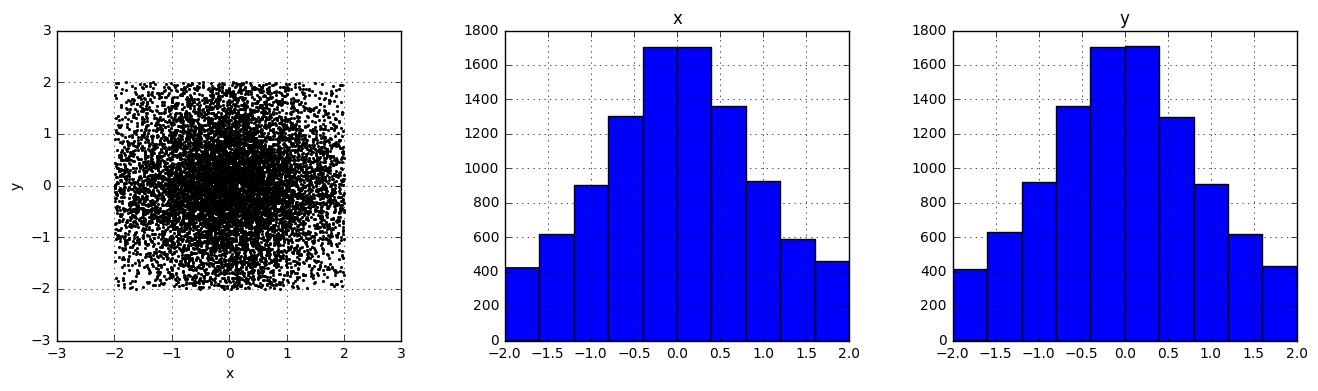

In [77]:
df = rejection_sampling(10000, f, (-2,2), (-2,2))

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(16,4)

df.plot.scatter('x', 'y', ax=axes[0], grid=True, s=1.5)
df.hist(ax=axes[1:])
plt.show()

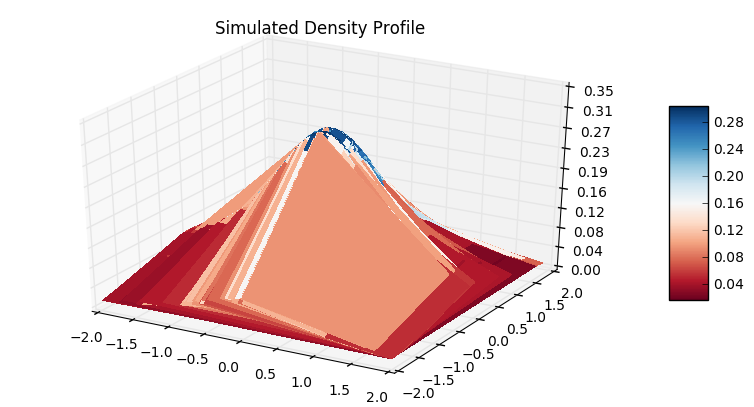

In [4]:
df = rejection_sampling(100, f, (-2,2), (-2,2))

X, Y = np.meshgrid(df['x'], df['y'])
Z = f(X, Y)


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Simulated Density Profile')
plt.show()

Checando empiricamente o resultado dado por $\mathbb{P}(|X-Y|\leq0.5)$

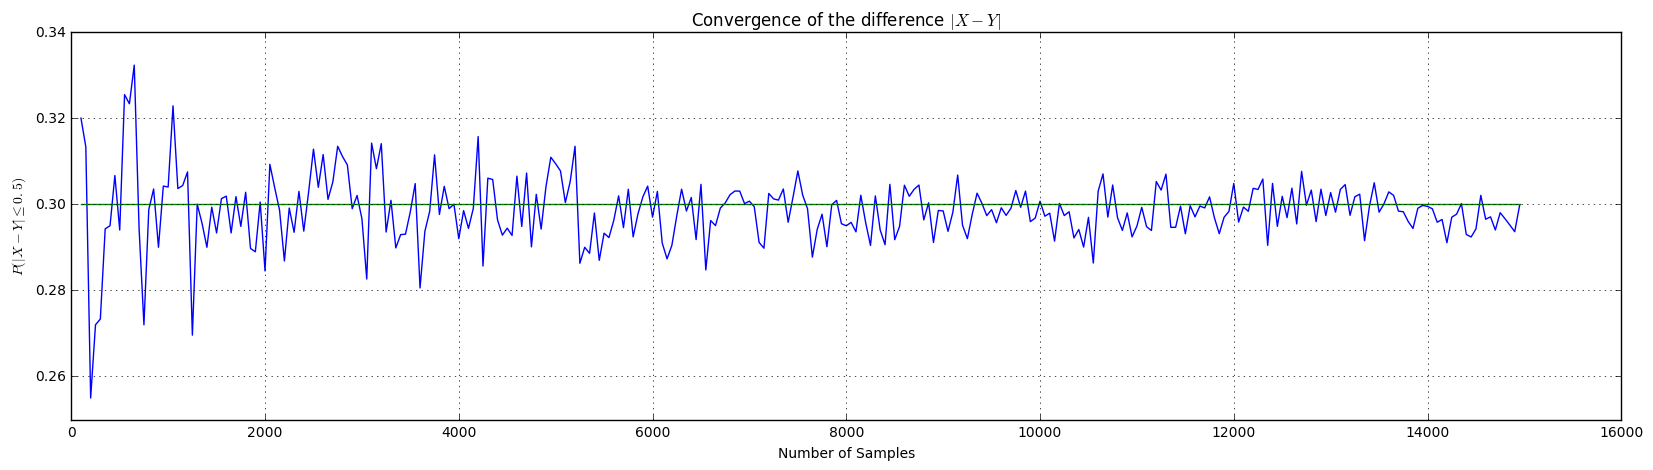

A convergência se dá ao valor 0.299


In [11]:
num_of_samples = np.arange(100, 15000, 50)
x_less_y = []

for n in num_of_samples:
    df = rejection_sampling(n, f, (-2,2), (-2,2))
    difference_probability = len(df[abs(df['x'] - df['y']) <= 0.5]) / n
    x_less_y.append(difference_probability)
    
plt.figure(figsize=(20,5))
plt.plot(num_of_samples, x_less_y)
plt.plot([min(num_of_samples), max(num_of_samples)], [0.3, 0.3])
plt.grid()
plt.title('Convergence of the difference $|X-Y|$')
plt.xlabel('Number of Samples')
plt.ylabel('$P(|X-Y| \leq 0.5)$')
plt.show()
print('A convergência se dá ao valor {}'.format(np.round(np.mean(x_less_y),3)))

Utilizando novamente o método da aceitação-rejeição, para amostrar da conjunta $g(x,y) = \frac{1}{1+x^2+y^2+x^2y^2}$.

<b>R: </b>Tome $g(x,y) = \frac{1}{1+x^2+y^2+x^2y^2}$, e portanto precisamos achar $M$, fazemos que $\nabla g(x,y)=0$,

$$
\
\begin{bmatrix}
    y(1+y^2)^{-1}\left((1+x^2)^{-1} - x(1+x^2)^{-2}(2x)\right) \\
    x(1+x^2)^{-1}\left((1+y^2)^{-1} - y(1+y^2)^{-2}(2y)\right) \\
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0 \\
\end{bmatrix}
\
\qquad 
\begin{cases}
    y(1-x^2) & = 0 \\
    x(1-y^2) & = 0
\end{cases}
\implies
x = \pm 1,\ y = \pm 1
$$

E portanto, o máximo da função g se dá em $g(1,1) = 1 = M$

In [41]:
def g(x,y):
    return 1/(x**2 + y**2 + x**2*y**2 + 1)
    
def rejection_sampling(sample_size, pdf, xlim, ylim, M=3):
    i = 0
    sample = []
    while (i<sample_size):
        u1 = np.random.uniform(xlim[0], xlim[1])
        u2 = np.random.uniform(ylim[0], ylim[1])
        u = np.random.uniform(0,1)
        if u < pdf(u1, u2)/M:
            sample.append((u1,u2))
            i+=1
    return pd.DataFrame(sample, columns=['x', 'y'])

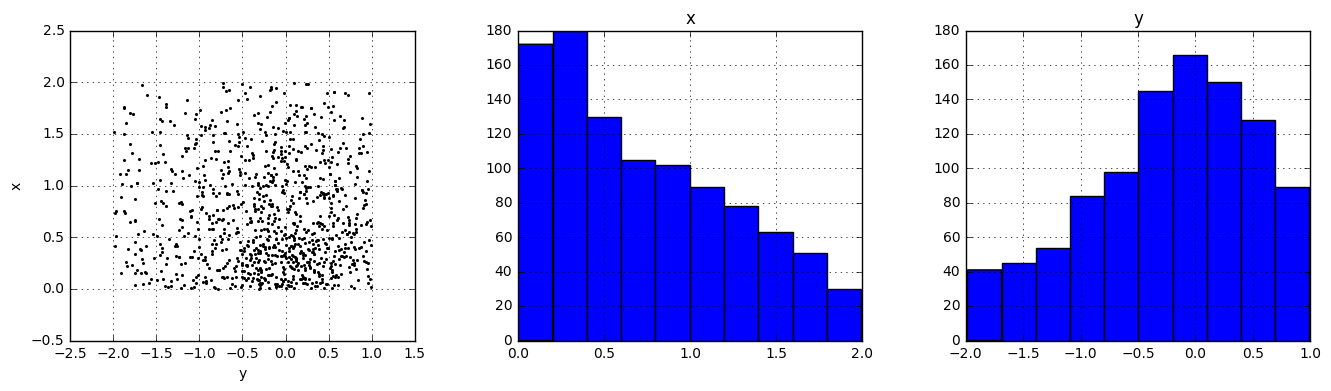

In [42]:
df = rejection_sampling(1000, g, (0,2), (-2,1))

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(16,4)

df.plot.scatter('y', 'x', ax=axes[0], grid=True, s=1.5)
df.hist(ax=axes[1:])
plt.show()

O valor de $I = \int_0^2 dx \int_{-2}^1 dy \frac{xy}{1+x^2+y^2+x^2y^2}$, analíticamente é dado por $I\approx-0.368678$

Iremos gerar uma função $f(x,y,z) = \frac{f(x,y)}{c}$, em que $f(x,y,z) = f(x,y)t(z)=\frac{xy}{3}$, e portanto $t(z)=\frac{1}{0.25}$ e Z ~ Unif$(0,\frac{1}{4})$

In [40]:
k = 0
for i in range(len(df)):
    k+= df['x'].iloc[i]*df['y'].iloc[i]/((df['y'].iloc[i]**2)*(df['x'].iloc[i]**2))
    
print(k/len(df))

2.925603547139898


___

<b>Exercício 3.</b> Resolver $I = \int _0 ^\infty \frac{1}{1+e^x} dx $

<b>R: </b>Para resolver esse exercício, utilizando a função instrumental $g(x)=e^{-x/2}$, fazemos que 

$$
I = \int _0 ^\infty \frac{1}{1+e^x} dx = \int _0 ^\infty \frac{1}{1+e^x} \frac{g(x)/2}{g(x)/2} dx
$$

Em que $\int _0 ^\infty \frac{g(x)}{2} dx = 1$, pois $\frac{g(x)}{2} \ \tilde{} \ Exp(-\frac{1}{2})$

Onde podemos escrever que $I = \mathbb{E}_f\left[h(x)\right] = \int_0^\infty h(x)f(x) = \int_0^\infty h(x)f(x)\frac{t(x)}{t(x)}=\mathbb{E}_t\left[h(x)\frac{f(x)}{t(x)}\right]$, e cada valor $X_i$ da amostra virá da distribuição $t$, que se trata de uma exponencial.

Utilizando o método da inversão, $F_t(t) = 1 - e^{-t/2} = u \implies X = -2log(1-U)$, e como $(1-U) \ \tilde {} \ Unif(0,1)$, temos,

$$
X = -2log(U), \qquad U \ \tilde{}\ Unif(0,1)
$$

E a integral $I$ pode ser estimada por 
$$m = \frac{1}{N} \sum_{i=1}^N \frac{h(X_i)f(X_i)}{t(X_i)}= \frac{\left(1+e^{X_i}\right)^{-1}}{(e^{-X_i/2})(1/2)}
$$
pois $h(x)f(x) = \frac{1}{1+e^x}$ e $t(x)=\frac{g(x)}{2}=\frac{e^{-x/2}}{2}$

Para sabermos se a variância é finita, precisamos calcular,
$$
Var_t\left[\frac{h(X)f(X)}{t(x)}\right] = \int_0 ^\infty \left(\frac{1}{1+e^x}\right)^2 \frac{e^{x/2}}{(1/2)} - m^2 \approx 0.142 - m^2
$$

E portanto a variância de fato é finita.


Resolvendo a integral para um intevalo de confiança com $\alpha=0.05$.

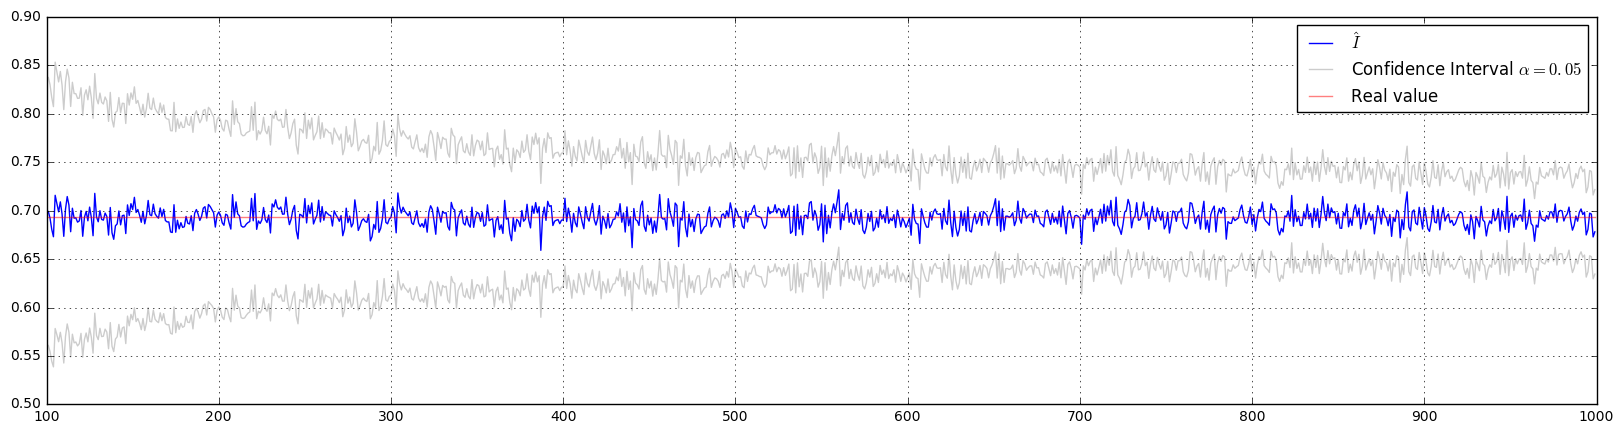

In [6]:
sample_size = np.arange(100,1000, 1)
integral_value = []
variance_value = []
confidence_interval_pos, confidence_interval_neg = [], []
for n in sample_size:
    U = np.random.uniform(0,1,1000)
    X = -2*np.log(U)

    integral_estimative = (1/len(X))*np.sum((1/(1+np.exp(X)))*np.exp(X/2)*2)
    variancia = (1/len(X))*np.sum(np.power(1/(1+np.exp(X)), 2)*np.exp(X/2)*2) - integral_estimative
    
    integral_value.append(integral_estimative)
    variance_value.append(variancia)
    
    confidence_interval_pos.append(integral_estimative + 1.96*np.sqrt(abs(variancia)/n))
    confidence_interval_neg.append(integral_estimative - 1.96*np.sqrt(abs(variancia)/n))

    
plt.figure(figsize=(20,5))
plt.plot(sample_size, integral_value, label='$\hat{I}$')
plt.plot(sample_size, confidence_interval_pos, 'k-', alpha=0.2, label='Confidence Interval $\\alpha = 0.05$')
plt.plot(sample_size, confidence_interval_neg, 'k-', alpha=0.2)
plt.plot([min(sample_size), max(sample_size)], [0.693, 0.693], 'r-', alpha=0.5, label='Real value')
plt.grid()
plt.legend()
plt.show()

Alternativamente, utiliza-se a função instrumental $g(x) = e^{-x}$, isso significa que X ~ Exp(1), e portanto nosso estimador será dado por

$$
\mathbb{E}_g\left[\frac{h(X)f(X)}{g(X)}\right]\rightarrow \hat{I}_n^{(1)}=\frac{1}{N}\sum_{i=1}^N \frac{e^{X_i}}{1+e^{X_i}}
$$

pois $h(x)f(x) = \frac{1}{1+e^x}$, e podemos simular $X = -ln(U)$, em que U ~ Unif(0,1).

Para sabermos se a variância de $\hat{I}_n^{(1)}$ é finita, podemos calcular 

$$
Var\left[ \frac{h^2(X)f^2(X)}{g(X)}\right] = \int _0 ^\infty \left(\frac{1}{1+e^x} \right)^2 e^x dx - \left(\hat{I}_n^{(1)}\right)^2
$$

Contudo, $\int _0 ^\infty \left(\frac{1}{1+e^x} \right)^2 e^x dx = \frac{1}{2} < \infty$, e portanto a variância é finita.

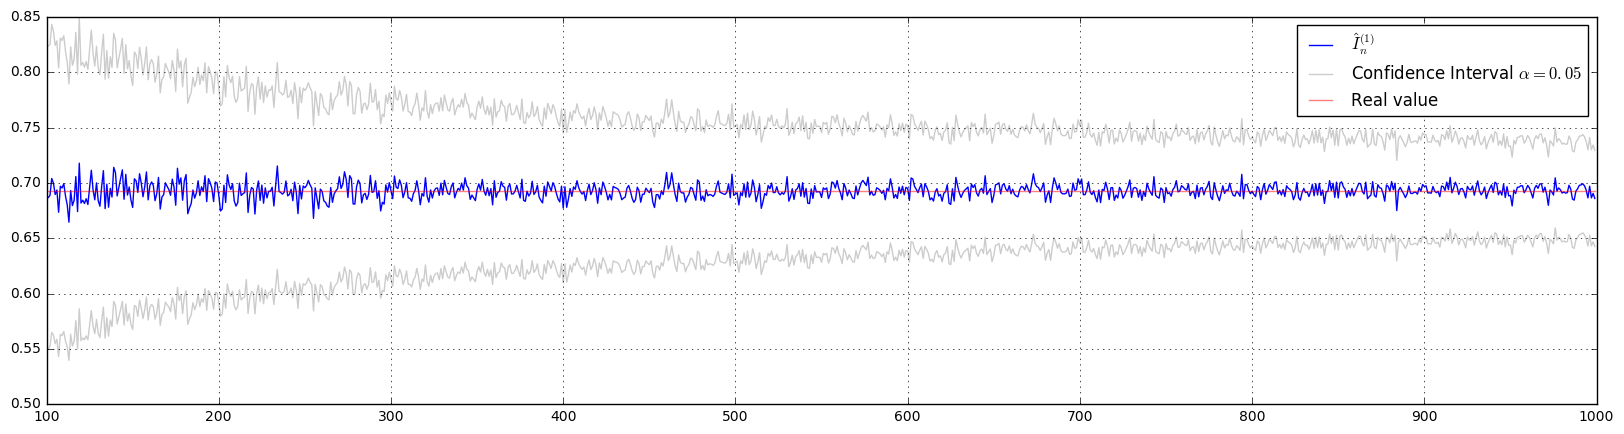

In [7]:
n_samples = 1000
num_of_samples = np.arange(100, n_samples,1)
integral_value = []
variance_value = []
confidence_interval_pos, confidence_interval_neg = [], []

for n in num_of_samples:
    U = np.random.uniform(0,1,n)
    X = -np.log(U)
    
    integral_estimative = (1/len(X))*np.sum(np.exp(X)/(1+np.exp(X)))
    variancia = (1/len(X))*np.sum(np.power(1/(1+np.exp(X)), 2)*np.exp(X)) - integral_estimative

    integral_value.append(integral_estimative)
    variance_value.append(variancia)
    
    confidence_interval_pos.append(integral_estimative + 1.96*np.sqrt(abs(variancia)/n))
    confidence_interval_neg.append(integral_estimative - 1.96*np.sqrt(abs(variancia)/n))
    
    
plt.figure(figsize=(20,5))
plt.plot(num_of_samples, integral_value, label='$\hat{I}_n^{(1)}$')
plt.plot(num_of_samples, confidence_interval_pos, 'k-', alpha=0.2, label='Confidence Interval $\\alpha = 0.05$')
plt.plot(num_of_samples, confidence_interval_neg, 'k-', alpha=0.2)
plt.plot([min(num_of_samples), max(num_of_samples)], [0.693, 0.693], 'r-', alpha=0.5, label='Real value')
plt.grid()
plt.legend()
plt.show()

___

<b> Exercício 2.</b>

2.1 - $X_s = (x_1,...,x_n)$ é uma amostra proveniente de $X$ ~ $Unif(-1,1)$,

$Y_s = (y_1,...,y_n)$ é uma amostra proveniente de $Y$ ~ $Unif(-1 + \theta, 1+\theta)$, $\theta > 0$

Tome n = 10.

Use a estatística de t-Student para testar as hipóteses: $H_0 : \mu_x = \mu_y$ e $H_1 : \mu_x \neq \mu_y$

$$t = \frac{\bar{x}-\bar{y}}{\sigma_p \sqrt{\frac{2}{n}}} \text{ with } \sigma_p = \sqrt{\frac{\hat{\sigma}_x^2(n-1) + \hat{\sigma}_y^2(n-1)}{2n-2}}
$$

In [8]:
def t_stat(X,Y,n):
    mean_x, mean_y = np.mean(X), np.mean(Y)
        
    sig_x = 1/(n-1)*np.sum([np.power(x - mean_x,2) for x in X])   
    sig_y = 1/(n-1)*np.sum([np.power(y - mean_y,2) for y in Y])   
    
    sig_p = np.sqrt((sig_x * (n-1) + sig_y * (n-1))/(2*n-2))

    t = (mean_x - mean_y) / (sig_p * np.sqrt(2/n))
    
    return t

def bootstrap_statistics(s1, s2, t, n):
    '''
    Dado duas amostras aleatórias, s1 e s2, gera uma amostra de bootstrap B.
    Retorna o cálculo de uma estatística t sobre a amostra bootstrap.
    n é o tamanho da amostra
    '''
    if type(s1) == type(np.array([])) and type(s2)== type(np.array([])):
        b = s1.tolist() + s2.tolist()
    else:
        b = s1 + s2
                                                          
    index_sampling = np.random.randint(0, len(b), len(b))
    
    x, y = [], []
    for i in index_sampling:
        if i < len(s1):
            x.append(b[i])
        else:
            y.append(b[i])
    
    return t(x,y,n)

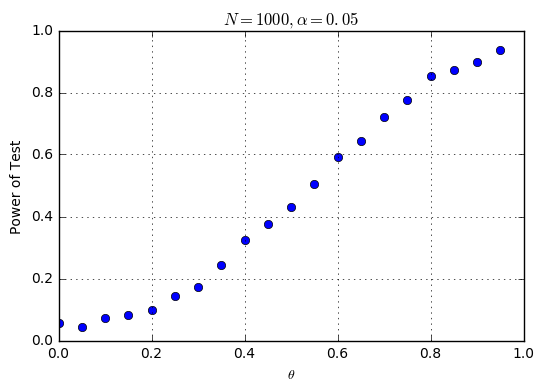

In [24]:
from scipy import stats

#-- Setando os parametros para as simulações
num_of_samples = 10
N = 1000
alpha = 0.05
degree_of_freedom = 2*num_of_samples - 2
thetas = np.arange(0,1,0.05)
t_vals = []
power_test = []

#-- Inicializando as simulações
for theta in thetas:
    X = [np.random.uniform(-1,1,num_of_samples) for xs in range(0,N)]
    Y = [np.random.uniform(-1 + theta, 1 + theta, num_of_samples) for ys in range(0,N)] 
    
    tk = [t_stat(X[i], Y[i], num_of_samples) for i in range(0,len(X))]
    Mi = 0
    for t in tk:
        #Calculando o P-Valor
        p = (1.0 - stats.t.cdf(abs(t), degree_of_freedom)) * 2 #cdf(x, df, loc=0, scale=1) 	Cumulative distribution function.

        # Se o p-valor for maior que alfa nós aceitamos a hipótese nula
        if p >= alpha:
            Mi+=1
    beta = Mi/len(tk)
    power_test.append(1-beta)
    
#-- Plotando as simulações our simulations
plt.plot(thetas, power_test, 'bo')
plt.title('$N = {}, \\alpha = {}$'.format(N, alpha))
plt.xlabel('$\\theta $')
plt.ylabel('Power of Test')
plt.grid()
plt.show()

Fazendo o mesmo procedimento que o anterior, mas agora com com bootstrapping.

C:\Users\Tibor\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


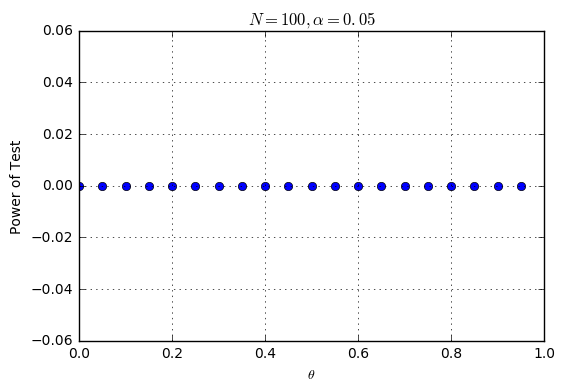

In [78]:
#-- Setando os parametros para as simulações
num_of_samples = 10
N = 100
alpha = 0.05
degree_of_freedom = 2*num_of_samples - 2
thetas = np.arange(0,1,0.05)
t_vals = []
power_test_bootstrap = []

#-- Inicializando as simulações
for theta in thetas:
    X = [np.random.uniform(-1,1,num_of_samples) for xs in range(0,N)]
    Y = [np.random.uniform(-1 + theta, 1 + theta, num_of_samples) for ys in range(0,N)] 
    t_obs = [t_stat(X[i], Y[i], num_of_samples) for i in range(0,len(X))]
    
    Mi = 0
    for Xs, Ys, t_obs in zip(X,Y, t_obs):
        indicator = 0
        for i in range(0,len(X)):
            t_bi = bootstrap_statistics(Xs, Ys, t_stat, num_of_samples)
            if t_bi >= t_obs:
                indicator+=1
        pbi = (1/len(X))*indicator
        if pbi >= alpha:
            Mi += 1
    
    beta = Mi/len(X)
    power_test_bootstrap.append(1 - beta)
    
plt.plot(thetas, power_test_bootstrap, 'bo')
plt.title('$N = {}, \\alpha = {}$'.format(N, alpha))
plt.xlabel('$\\theta $')
plt.ylabel('Power of Test')
plt.grid()
plt.show()

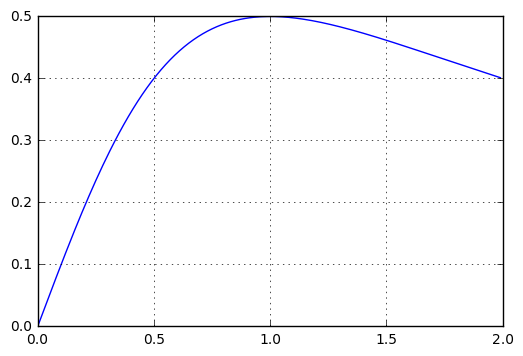

In [11]:
x = np.arange(0,2,0.01)
y = [k/(1+k**2) for k in x]

plt.plot(x,y)
plt.grid()